<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="700" height="200" />


### <font color='navy'> Modelos no lineales para pronósticos.

**Nombres:**
- Zamarrón Álvarez, Ana Rosaura
- Castillejos Jauregui, Claudia Celeste

**Fecha:** 24 de abril del 2023.

**Expediente** :
- 736222
- 735868

**Profesor:** Oscar David Jaramillo Zuluaga.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Cargamos los datos
data = pd.read_csv("/traffic.csv")
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# El tamaño del arreglo 
data.shape

(48120, 4)

In [ ]:
#Ver el tipo de dato de las variables
data.dtypes

DateTime    object
Junction     int64
Vehicles     int64
ID           int64
dtype: object

In [ ]:
# Cambiar el tipo de dato de las variables necesarias
data["ID"] = data["ID"].astype("object")
data["DateTime"] = pd.to_datetime(data['DateTime'])

In [ ]:
# Ver el resultado del cambio en el tipo de variable 
data.dtypes

DateTime    datetime64[ns]
Junction             int64
Vehicles             int64
ID                  object
dtype: object

In [ ]:
# Descripción de las variables numéricas
data.describe()

,Junction,Vehicles
count,48120.000000,48120.000000
mean,2.180549,22.791334
std,0.966955,20.750063
min,1.000000,1.000000
25%,1.000000,9.000000
50%,2.000000,15.000000
75%,3.000000,29.000000
max,4.000000,180.000000


In [ ]:
# Vemos los valores de la columna date+time
data["DateTime"].value_counts()

2017-06-30 23:00:00    4
2017-03-02 02:00:00    4
2017-03-02 16:00:00    4
2017-03-02 15:00:00    4
2017-03-02 14:00:00    4
                      ..
2016-05-21 19:00:00    3
2016-05-21 20:00:00    3
2016-05-21 21:00:00    3
2016-05-21 22:00:00    3
2016-08-31 00:00:00    3
Name: DateTime, Length: 14592, dtype: int64

In [ ]:
# Ver los registros con esa fecha
data[data["DateTime"] == "2017-06-30 23:00:00"]

,DateTime,Junction,Vehicles,ID
14591,2017-06-30 23:00:00,1,78,20170630231
29183,2017-06-30 23:00:00,2,27,20170630232
43775,2017-06-30 23:00:00,3,39,20170630233
48119,2017-06-30 23:00:00,4,12,20170630234


In [ ]:
# Ver los registros con esa fecha
data[data["DateTime"] == "2017-03-02 02:00:00"]

,DateTime,Junction,Vehicles,ID
11690,2017-03-02 02:00:00,1,50,20170302021
26282,2017-03-02 02:00:00,2,24,20170302022
40874,2017-03-02 02:00:00,3,11,20170302023
45218,2017-03-02 02:00:00,4,5,20170302024


Las fechas se repiten para cada junction. Nos quedaremos con una sola serie , la de Junction 1.

In [ ]:
# Reducimos la base de datos
junction1 = data[data["Junction"] == 1]
junction1.shape

(14592, 4)

In [ ]:
#Hacemos una reducción de la base de datos
timeseries = junction1[["DateTime", "Vehicles"]].set_index('DateTime')
timeseries.head()

,Vehicles
DateTime,
2015-11-01 00:00:00,15
2015-11-01 01:00:00,13
2015-11-01 02:00:00,10
2015-11-01 03:00:00,7
2015-11-01 04:00:00,9


Text(0.5, 1.0, 'Junction 1 Vehicles Timeserie')

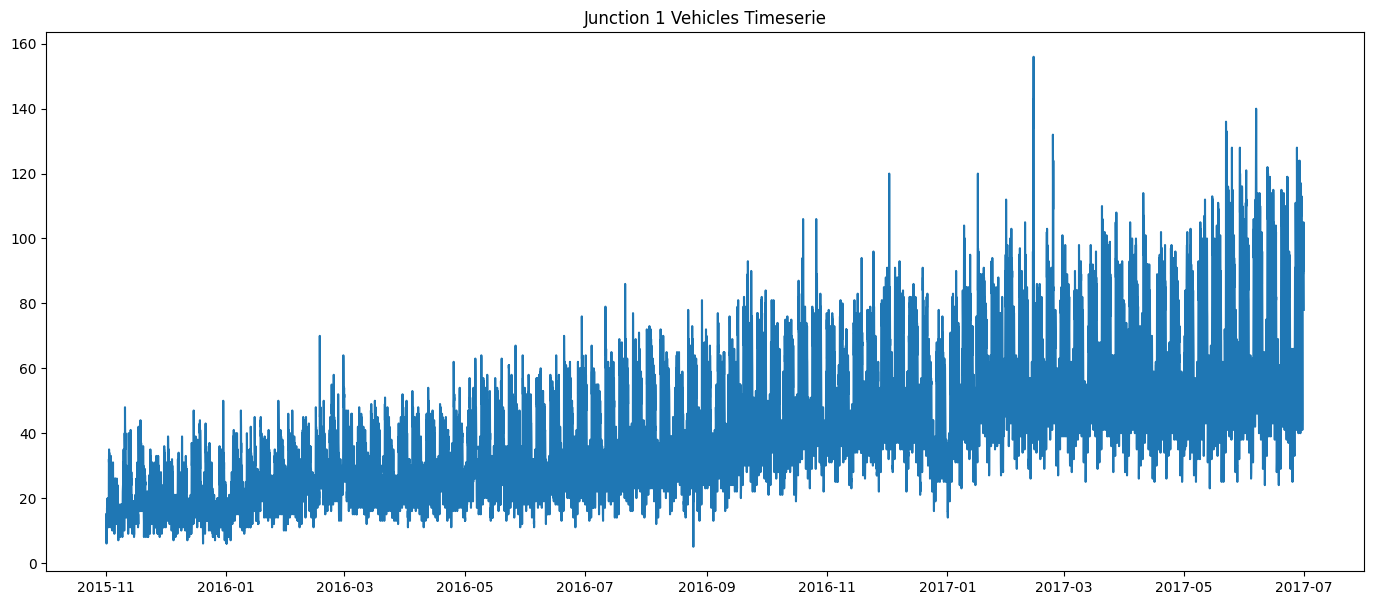

In [ ]:
# Graficamos la serie de tiempo 
plt.figure(figsize=(17,7))
plt.plot(timeseries)
plt.title("Junction 1 Vehicles Timeserie")

array([[<Axes: title={'center': 'Vehicles'}>]], dtype=object)

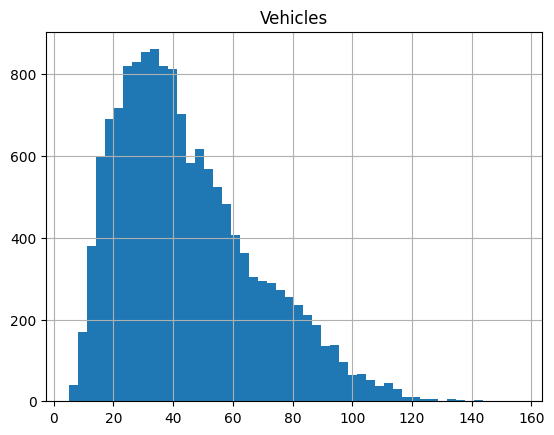

In [ ]:
# Histogramas
timeseries.hist(bins=50)

<Axes: >

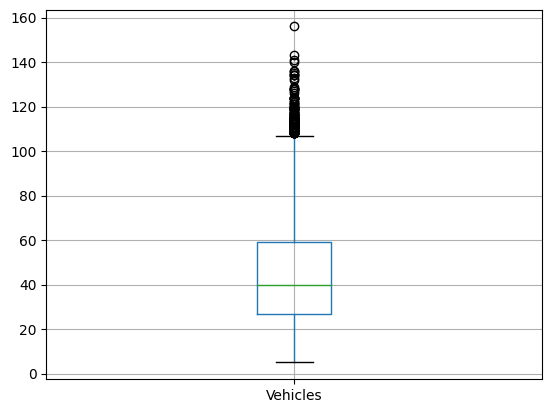

In [ ]:
# Distribución de las varibales numéricas
timeseries.boxplot()

Tenemos varios outliers pero no consideramos que haga falta eliminarlas o tratarlas.

In [ ]:
# Descripción de las variables numéricas
timeseries.describe()

,Vehicles
count,14592.000000
mean,45.052906
std,23.008345
min,5.000000
25%,27.000000
50%,40.000000
75%,59.000000
max,156.000000


## Modelos lineales

## Modelos no lineales

#### MLP

In [54]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps

        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

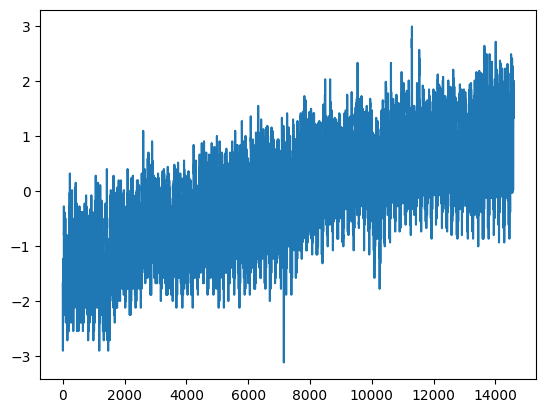

In [55]:
plt.plot(vals_bc)

In [56]:
# Elegir un número de pasos de tiempo
n_steps = 3
# Dividir en muestras
X, y = split_univariate_sequence(vals_bc, n_steps)

print('X', X, 'y', y, sep='\n')

X
[[[-1.67867827]
  [-1.88844909]
  [-2.25500586]]

 [[-1.88844909]
  [-2.25500586]
  [-2.71806446]]

 [[-2.25500586]
  [-2.71806446]
  [-2.39589795]]

 ...

 [[ 1.77549711]
  [ 2.00961311]
  [ 1.79973176]]

 [[ 2.00961311]
  [ 1.79973176]
  [ 1.65131936]]

 [[ 1.79973176]
  [ 1.65131936]
  [ 1.49516005]]]
y
[[-2.71806446]
 [-2.39589795]
 [-2.9063654 ]
 ...
 [ 1.65131936]
 [ 1.49516005]
 [ 1.33024985]]


In [57]:
# Definimos el modelo
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [58]:
def split_dataset(X, y):
    """
    Función que se encarga de dividir la data ingresada en datos de entrenamiento, validación y prueba.
    :param data: Data con la información de la serie de tiempo a analizar.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

    return X_train, y_train, X_val, y_val, X_test, y_test

In [59]:
X_train, y_train, X_val, y_val, X_test, y_test = split_dataset(X, y)
print("X_train shape:", X_train.shape, "\ny_train shape:",y_train.shape,"\nX_val shape: ", X_val.shape, "\ny_val shape:", y_val.shape, "\nX_test shape:",X_test.shape, "\ny_test shape:",y_test.shape)

X_train shape: (10503, 3, 1) 
y_train shape: (10503, 1) 
X_val shape:  (1168, 3, 1) 
y_val shape: (1168, 1) 
X_test shape: (2918, 3, 1) 
y_test shape: (2918, 1)


In [60]:
def modelo2(n_steps, X_train, y_train, X_val, y_val, X_test, y_test):
    model = keras.models.Sequential([
        keras.layers.Input(n_steps),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1)
    ])

    # Compilar el modelo y definir métricas y funciones de pérdida
    model.compile(optimizer='adam', loss='mape', metrics="mse")

    # Resumir el modelo compilado
    model.summary()

    history1 = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=False)

    # Analizar función de pérdida
    plt.plot(history1.history['loss'], 'r--', label='loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

    # Analizar las métricas
    plt.plot(history1.history['mse'], 'r--', label='loss')
    plt.xlabel('epochs')
    plt.ylabel('mse')
    plt.legend()
    plt.show()

    # Evaluar el modelo en el conjunto de prueba
    test_mape_score, test_mse_score = model.evaluate(X_test, y_test)
    return test_mape_score, test_mse_score


In [ ]:
test_mape_score, test_mse_score = modelo2(n_steps, X_train, y_train, X_val, y_val, X_test, y_test)
print('MAPE en el conjunto de prueba:', test_mape_score)
print('MSE en el conjunto de prueba:', test_mse_score)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               1024      
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 44,289
Trainable params: 44,289
Non-trainable params: 0
_________________________________________________________________


#### CNN

In [ ]:
# Definir la secuencia de entrada
raw_seq = vals_bc.tolist()
# Elegir un número de pasos de tiempo
n_steps = 3
# Número de características de mis datos
n_features = 1
# Dividir en muestras
X, y = split_univariate_sequence(raw_seq, n_steps)

print('X', X, 'y', y, sep='\n')

X
[[[-0.42298395]
  [ 0.61595232]
  [ 0.99963621]]

 [[ 0.61595232]
  [ 0.99963621]
  [ 0.71840249]]

 [[ 0.99963621]
  [ 0.71840249]
  [ 1.15315905]]

 ...

 [[-2.20484733]
  [ 0.53353761]
  [ 0.07171374]]

 [[ 0.53353761]
  [ 0.07171374]
  [ 2.84483699]]

 [[ 0.07171374]
  [ 2.84483699]
  [-0.41735238]]]
y
[[ 0.71840249]
 [ 1.15315905]
 [ 1.01253194]
 ...
 [ 2.84483699]
 [-0.41735238]
 [ 0.72163297]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D

In [ ]:
def modelo_cnn(n_steps, X_train, y_train, X_val, y_val, X_test, y_test):

    # Definimos el modelo
    model_1 = Sequential()
    model_1.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
    model_1.add(Dense(32, activation='relu'))
    model_1.add(MaxPooling1D())
    model_1.add(Flatten())
    model_1.add(Dense(1))

    model_1.summary()

    # Compilar el modelo y definir métricas y funciones de pérdida
    model_1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mape', metrics=['mse'])

    h = model_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=False)

    # Analizar función de pérdida
    plt.plot(h.history['loss'], 'r--', label='loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

    # Analizar las métricas
    plt.plot(h.history['mse'], 'r--', label='loss')
    plt.xlabel('epochs')
    plt.ylabel('mse')
    plt.legend()
    plt.show()

    # Evaluar el modelo en el conjunto de prueba
    test_mape_score, test_mse_score = model_1.evaluate(X_test, y_test)
    return test_mape_score, test_mse_score


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 64)             192       
                                                                 
 dense_13 (Dense)            (None, 2, 32)             2080      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 32)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
____________________________________________________

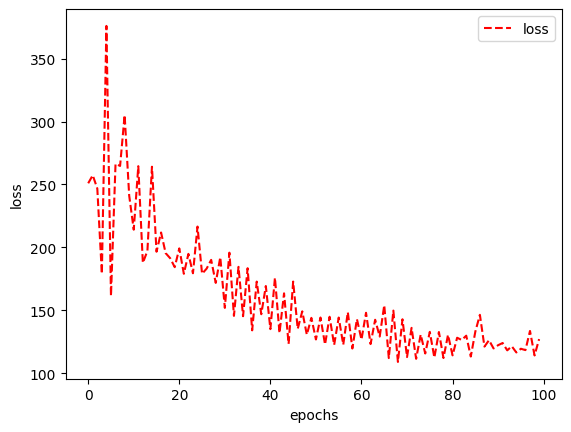

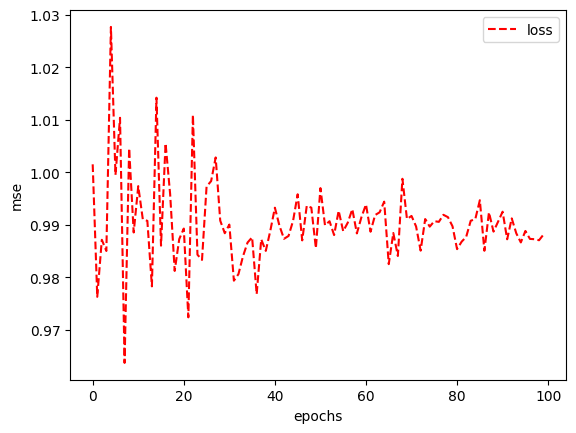

19/19 [==============================] - 0s 2ms/step - loss: 110.8063 - mse: 1.0378
MAPE en el conjunto de prueba: 110.80632019042969
MSE en el conjunto de prueba: 1.0378292798995972


In [ ]:
cnn_test_mape_score1, cnn_test_mse_score1 = modelo_cnn(n_steps, X_train, y_train, X_val, y_val, X_test, y_test)
print('MAPE en el conjunto de prueba:', cnn_test_mape_score1)
print('MSE en el conjunto de prueba:', cnn_test_mse_score1)

#### LSTM

In [ ]:
LSTM_earlystop = EarlyStopping(monitor='loss', min_delta=0, patience=15)

NameError: ignored